In [194]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

### 1.
We reuse the function `lagrange_basis`, defined for the lab midterm. We can then write a function that compute $\rVert L_n \rVert$. We plot this function, and experimentally determine that $C \approx 0.87$.

In [51]:
def lagrange_basis(j, xs):
    ''' Compute the j-th Lagrange basis of `f` using the nodes given by `xs` '''
    def basis(x):
        prod = 1.0
        for i in range(len(xs)):
            if i != j:
                prod *= (x - xs[i]) / (xs[j] - xs[i])
        return prod
    return basis


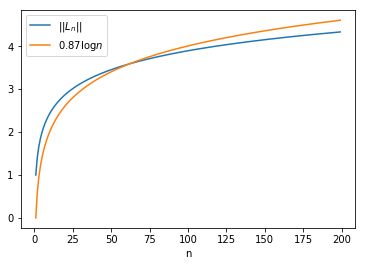

In [52]:
def lebesgue_constant(n):
    xs = [np.cos((2.*k-1.)/(2.*n)*np.pi) for k in range(1, n+1)]
    return sum([abs(lagrange_basis(k, xs)(1.0)) for k in range(n)])

plt.plot([n for n in range(1,200)], [lebesgue_constant(n) for n in range(1,200)], label=r'$||L_n||$')
plt.plot([n for n in range(1,200)], [0.87*np.log(n) for n in range(1,200)], label=r'$0.87\log n$')
plt.xlabel(r'n')
plt.legend()
plt.show()

### 2.
By the chain rule, we have 
$$ \lambda'_n(x) = \sum_{k=0}^n |\phi_{n,k}'(x)| \cdot \text{sgn}(\phi_{n,k}(x)) $$
and we can find that
$$ \phi_{n,k}'(x) = \sum_{i=0,i\ne k}^n \left( \frac 1 {x_k - x_i} \prod_{j=0,j\ne i,k}^n \frac {x - x_j} {x_k - x_j} \right).
$$
With that, we can define a Python function to computes $\lambda'$. In order to check that the function is correct, we plot $\lambda_n$ and $\lambda_n'$.

Now we attempt to find the roots of $\lambda_n'$. I tried using the secant method, but it does not yield correct results.

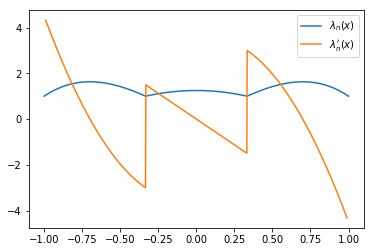

In [114]:
def lagrange_basis_derivative(k, xs):
    n = len(xs)
    def f(x):
        s = 0
        for i in range(n):
            if i == k: continue
            s += 1.0 / (x - xs[i])
        return lagrange_basis(k, xs)(x) * s
    return f

def lambda_(n):
    xs = np.linspace(-1, 1, n)
    return lambda x: sum([abs(lagrange_basis(k, xs)(x)) for k in range(n)])

def lambda_derivative(n):
    xs = np.linspace(-1, 1, n)
    return lambda x: sum([lagrange_basis_derivative(k, xs)(x) * np.sign(lagrange_basis(k, xs)(x)) for k in range(n)])
 
    
plt.plot([x for x in np.linspace(-1, 1, 1000)], [lambda_(4)(x) for x in np.linspace(-1, 1, 1000)], label=r'$\lambda_n(x)$')
plt.plot([x for x in np.linspace(-0.99, 0.99, 1000)], [lambda_derivative(4)(x) for x in np.linspace(-0.99, 0.99, 1000)], label=r"$\lambda_n'(x)$")
plt.legend()
plt.show()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


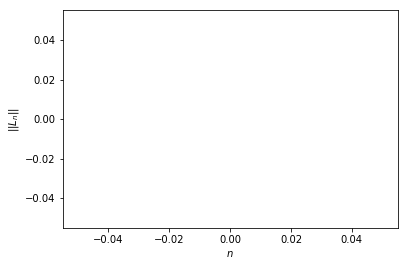

In [253]:

def find_root(n):
    xs = np.linspace(-1, 1, n)
    x1 = (xs[0] + xs[1]) / 2.0
    x2 = xs[1]
    f = lambda_derivative(n)
    for i in range(10):
        x1, x2 = x1 - f(x1) * (x1 - x2) / (f(x1) - f(x2)), x1
    return x1

plt.plot([n for n in range(2, 50)], [find_root(n) for n in range(2, 50)])
plt.xlabel(r"$n$")
plt.ylabel(r"$||L_n||$")
plt.show()

### 3.
We first define a general function `integrate` that computes the integral of a function over an interval. We then use this function to calculate $||S_n||$, which we then plot against $n$ for $n=1, \ldots, 300$.

We then experimentally determine that $C \approx 1.08$.

0.01253762404898313 1.0802899737655391


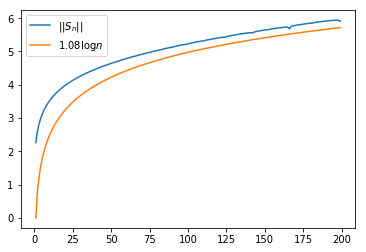

In [217]:
def integrate(f, a, b, n):
    ''' Integrate f using the composite trapezoidal rule, based on uniform intervals '''
    xs = np.linspace(a, b, n)
    h = (b - a) / n
    return (h/2) * f(a) + (h/2) * f(b) + sum([h*f(x) for x in xs])

def f(n, theta):
    return np.abs(np.sin((n + 0.5) * theta) / (2 * np.sin(0.5 * theta)))

def S(n):
    return integrate(lambda z: f(n, z), 0.0001, np.pi, 1000)

plt.plot(range(1, 200), [S(n) for n in range(1, 200)], label=r'$||S_n||$')
[a, c] = np.polyfit(deg=1, x=range(1,40), y=[np.log(S(n)) for n in range(1, 40)])
print(a, c)
plt.plot(range(1,200), [c * np.log(n) for n in range(1, 200)], label=(r'%.2f$\log n$' % c))
plt.legend()
plt.show()

### 4.
We define `P(n)` to compute the Lebesgue polynomial $P_n$. We then use this function and the previously defined `integrate` function to calculate $||S_n||$.

We experimentally find that $C \approx 1.55$.

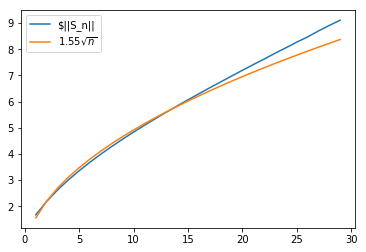

In [218]:
def P(n):
    def f(x):
        s = 0
        for k in range(n+1):
            s += (scipy.special.binom(n, k) ** 2) * ((x-1) ** (n - k)) * ((x + 1) ** k)
        return (1. / (2**n)) * s
    return f

def S(n):
    return integrate(lambda x: abs(sum([((2*k+1) * 0.5) * P(k)(x) for k in range(n+1)])), -1, 1, 1000)

plt.plot(range(1, 30), [S(n) for n in range(1, 30)], label=r'$||S_n||$')
[a, c] = np.polyfit(deg=1, x=range(1, 30), y=[S(n) ** 0.5 for n in range(1,30)])
plt.plot(range(1, 30), [n ** 0.5 * c for n in range(1, 30)], label=(r'%.2f$\sqrt{n}$' % c))
plt.legend()
plt.show()

### 5.
We plot $||Q_n||$ against $n$. The function seems somewhat exponential, but oscillates a lot. We guess that it is equal to $$
f(n) = \begin{cases}
e^{0.36 n} \text { if n is odd }\\
e^{0.3  n} \text { if n is even }\\
\end{cases}
$$.

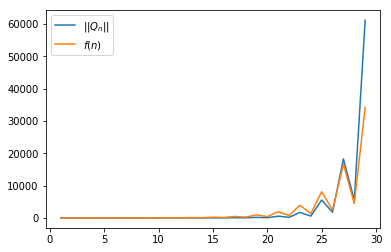

In [251]:
def omega(n, k):
    xs = np.linspace(0, 1, n)
    return integrate(lagrange_basis(k, xs), 0, 1, 300)

def Q(n):
    return sum([abs(omega(n, k)) for k in range(n)])

def f(n):
    if n % 2 == 1:
        return np.exp(0.36 * n) 
    else:
        return np.exp(0.3 * n)

plt.plot(range(1, 30), [Q(n) for n in range(1, 30)], label=r'$||Q_n||$')
plt.plot(range(1, 30), [f(n) for n in range(1, 30)], label=r'$f(n)$')
plt.legend()
plt.show()